In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [2]:
data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])

In [3]:
df=data.copy()
conditions3 = [
    (df.L100800 < 100)  ,
    (df.L100800 >= 100) & (df.L100800 < 126),
    (df.L100800 >= 126)]
choices3 = [0,1,2]
df['CLASS'] = np.select(conditions3, choices3, default=0)
df.head()
data=df.copy()

In [4]:
data=data[data.FIELD_16!=1]
data=data[data.FIELD_23!=1]
data=data[data.FIELD_15!=1]
data=data[data.FIELD_17!=1]
data=data[data.FIELD_22!=1]
data=data[data.FIELD_24!=1]

In [5]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])
categorical_cols.append('CLASS')

Calculate correlation Value - for numerical values
========

In [6]:
corr=data[numerical_cols].corr()

In [7]:
val= pd.DataFrame(corr['CLASS']).sort_values(by='CLASS', ascending=False)
# val.head(15)

mydataset=data.copy()[numerical_cols]
colslist_original=mydataset.columns
DiabeticColVals_original=mydataset.CLASS

cor_original=[]
count_original=[]

for i in range(len(colslist_original)):
    print(i,colslist_original[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals_original
    temp['b']=mydataset[colslist_original[i]]
    temp=temp.dropna()
    count_original.append(temp.shape[0])
    tempcor=temp.corr()
    
    if(tempcor.shape[0]>1):
        print(temp.shape)
        cor_original.append(abs(tempcor.b[0]))
    else:
        cor_original.append(0)
    


0 Unnamed: 0
(466680, 2)
1 COMPARE
(466680, 2)
2 AGE
(466679, 2)
3 SEX
(466679, 2)
4 L100100
(446887, 2)
5 L100200
(447258, 2)
6 L100300
(439878, 2)
7 L100400
(446373, 2)
8 L100500
(465605, 2)
9 L100700
(447592, 2)
10 L100800
(466134, 2)
11 L101000
(452131, 2)
12 L101100
(240499, 2)
13 L101200
(466235, 2)
14 L101300
(466235, 2)
15 L101400
(401562, 2)
16 L101600
(452094, 2)
17 L101700
(465651, 2)
18 L102000
(69625, 2)
19 L102200
(5538, 2)
20 L102400
(302843, 2)
21 L102500
(15638, 2)
22 L102700
(246546, 2)
23 L102800
(687, 2)
24 L102900
(465273, 2)
25 L103000
(465103, 2)
26 L103100
(464378, 2)
27 L103200
(464362, 2)
28 L103300
(397549, 2)
29 L103400
(173778, 2)
30 L103500
(173723, 2)
31 L103600
(168183, 2)
32 L103700
(199637, 2)
33 L103800
(201755, 2)
34 L103900
(7613, 2)
35 L104000
(9224, 2)
36 L104200
(8268, 2)
37 L104300
(258408, 2)
38 L104400
(244326, 2)
39 L104500
(244330, 2)
40 L104600
(161194, 2)
41 L104800
(12, 2)
42 L104900
(15684, 2)
43 L105200
(465514, 2)
44 L105300
(16, 2)
45

In [8]:
CorValWithCorr=pd.DataFrame()    
CorValWithCorr['Cols']=colslist_original
CorValWithCorr['Corr']=cor_original
CorValWithCorr['Count']=count_original
CorValWithCorr=CorValWithCorr.sort_values(by='Corr', ascending=False)

CorValWithCorr.head(5)

,Cols,Corr,Count
276,CLASS,1.000000,466680
148,L501600,1.000000,2
152,L502000,0.956054,4
117,L303204,0.774597,4
114,L303201,0.774597,4


In [9]:
CorValWithCorr2=CorValWithCorr.copy()
CorValWithCorr2=CorValWithCorr2[CorValWithCorr2.Count>200000].sort_values(by='Corr', ascending=False)
CorValWithCorr2=CorValWithCorr2.reset_index().drop(columns = ['index'])

print(list(CorValWithCorr2.head(16).Cols))
CorValWithCorr2.head(16)

['CLASS', 'L100800', 'L103000', 'S000300', 'S000501', 'L103300', 'S000502', 'L101700', 'SEX', 'L190400', 'AGE', 'L190500', 'L100700', 'L101300', 'L190300', 'max']


,Cols,Corr,Count
0,CLASS,1.000000,466680
1,L100800,0.741084,466134
2,L103000,0.317276,465103
3,S000300,0.269091,465393
4,S000501,0.261315,466410
5,L103300,0.247816,397549
6,S000502,0.243479,466410
7,L101700,0.232917,465651
8,SEX,0.221267,466679
9,L190400,0.210684,466197


Anova test
=======

In [10]:
from scipy import stats

mydataset=data.copy()[numerical_cols]
colslist=mydataset.columns
DiabeticColVals=mydataset.CLASS

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]]
    temp=temp.dropna()
    count.append(temp.shape[0])
    tempcor=temp.corr()
    if(tempcor.shape[0]>1):        
        F, p = stats.f_oneway(temp[temp['a']==0].b,temp[temp['a']==1].b,temp[temp['a']==2].b) 
        print(temp.shape)
        cor.append(F)
        pval.append(p)
    else:
        cor.append(0)
        pval.append(0)
    

0 Unnamed: 0
(466680, 2)
1 COMPARE
(466680, 2)
2 AGE
(466679, 2)
3 SEX
(466679, 2)
4 L100100
(446887, 2)
5 L100200
(447258, 2)
6 L100300
(439878, 2)
7 L100400
(446373, 2)
8 L100500
(465605, 2)
9 L100700
(447592, 2)
10 L100800
(466134, 2)
11 L101000
(452131, 2)
12 L101100
(240499, 2)
13 L101200
(466235, 2)
14 L101300
(466235, 2)
15 L101400
(401562, 2)
16 L101600
(452094, 2)
17 L101700
(465651, 2)
18 L102000
(69625, 2)
19 L102200
(5538, 2)
20 L102400
(302843, 2)
21 L102500
(15638, 2)
22 L102700
(246546, 2)
23 L102800
(687, 2)
24 L102900
(465273, 2)
25 L103000
(465103, 2)
26 L103100
(464378, 2)
27 L103200
(464362, 2)
28 L103300
(397549, 2)
29 L103400
(173778, 2)
30 L103500
(173723, 2)
31 L103600
(168183, 2)
32 L103700
(199637, 2)
33 L103800
(201755, 2)
34 L103900
(7613, 2)
35 L104000
(9224, 2)
36 L104200
(8268, 2)
37 L104300
(258408, 2)
38 L104400
(244326, 2)
39 L104500
(244330, 2)
40 L104600
(161194, 2)
41 L104800
(12, 2)
42 L104900
(15684, 2)
43 L105200
(465514, 2)
44 L105300
(16, 2)
45

In [11]:
mydataset=data.copy()[numerical_cols]
colslist=mydataset.columns
DiabeticColVals=mydataset.CLASS

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]]
    temp=temp.dropna()
    count.append(temp.shape[0])
    tempcor=temp.corr()
    if(tempcor.shape[0]>1):        
        F, p = stats.f_oneway(temp[temp['a']==0].b,temp[temp['a']==1].b,temp[temp['a']==2].b) 
        print(temp.shape)
        cor.append(F)
        pval.append(p)
    else:
        cor.append(0)
    

0 Unnamed: 0
(466680, 2)
1 COMPARE
(466680, 2)
2 AGE
(466679, 2)
3 SEX
(466679, 2)
4 L100100
(446887, 2)
5 L100200
(447258, 2)
6 L100300
(439878, 2)
7 L100400
(446373, 2)
8 L100500
(465605, 2)
9 L100700
(447592, 2)
10 L100800
(466134, 2)
11 L101000
(452131, 2)
12 L101100
(240499, 2)
13 L101200
(466235, 2)
14 L101300
(466235, 2)
15 L101400
(401562, 2)
16 L101600
(452094, 2)
17 L101700
(465651, 2)
18 L102000
(69625, 2)
19 L102200
(5538, 2)
20 L102400
(302843, 2)
21 L102500
(15638, 2)
22 L102700
(246546, 2)
23 L102800
(687, 2)
24 L102900
(465273, 2)
25 L103000
(465103, 2)
26 L103100
(464378, 2)
27 L103200
(464362, 2)
28 L103300
(397549, 2)
29 L103400
(173778, 2)
30 L103500
(173723, 2)
31 L103600
(168183, 2)
32 L103700
(199637, 2)
33 L103800
(201755, 2)
34 L103900
(7613, 2)
35 L104000
(9224, 2)
36 L104200
(8268, 2)
37 L104300
(258408, 2)
38 L104400
(244326, 2)
39 L104500
(244330, 2)
40 L104600
(161194, 2)
41 L104800
(12, 2)
42 L104900
(15684, 2)
43 L105200
(465514, 2)
44 L105300
(16, 2)
45

In [12]:

FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [20]:
FvalPvalCorr[FvalPvalCorr.Count>100000].head(17)

,Cols,F,P,Count
10,L100800,395085.487922,0.0,466134
40,L104600,42395.642121,0.0,161194
25,L103000,26797.148687,0.0,465103
211,S000300,18231.079620,0.0,465393
213,S000501,17197.234862,0.0,466410
214,S000502,14745.753045,0.0,466410
17,L101700,13627.364322,0.0,465651
28,L103300,13051.265944,0.0,397549
3,SEX,12479.338548,0.0,466679
92,L190400,10914.114772,0.0,466197


In [21]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>100000].Cols)[:17])

['L100800', 'L104600', 'L103000', 'S000300', 'S000501', 'S000502', 'L101700', 'L103300', 'SEX', 'L190400', 'AGE', 'L190500', 'L100700', 'L101300', 'L190300', 'L102900', 'L103100']


correlation for categorical values
============

In [22]:
mydata=data[categorical_cols]

mydata=mydata.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
                           'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
                           'FIELD_103','FIELD_106'])
# FIELD_39 ?
mydata=mydata.drop(mydata[mydata.FIELD_3=='`'].index)
mydata=mydata.drop(mydata[mydata.FIELD_3=='G'].index)


mydata=mydata.drop(mydata[mydata.FIELD_4=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_5=='.'].index)

mydata=mydata.drop(mydata[mydata.FIELD_35=='?'].index)
mydata=mydata.drop(mydata[mydata.FIELD_35=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_36=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_37=='\\'].index)
 
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '7+' ].index)
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '5~7'].index)
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '3-4'].index)


mydata=mydata.drop(mydata[mydata.FIELD_95=='.'].index)

In [23]:
AllTables=[]
for j in range(len(mydata.columns)):
    
    
    columnName = mydata.columns[j]
    print(j,columnName)
    
    temp=mydata[columnName].dropna().astype(float).unique() 
    mytempdata=mydata[[columnName,'CLASS']].dropna()
    mytempdata[columnName]=mytempdata[columnName].astype(float)
    temptable=[]
    
    sumval=0

    for i in range(temp.shape[0]):
        
        temp_i_val=str(temp[i])
        class0_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 0' ).shape[0]
        class1_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 1' ).shape[0]
        class2_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 2' ).shape[0]
        
        sumval = sumval + (class0_count+class1_count+class2_count)

        temptable.append(
        [
            class0_count,class1_count,class2_count
        ])
    
    print(sumval,mytempdata.shape[0], mytempdata.shape[0] == sumval)
    
    if(len(temptable) > 1):
        AllTables.append([temptable , columnName , mytempdata.shape[0] ] )
        print(mydata.columns[j])



0 FIELD_3
256012 256012 True
FIELD_3
1 FIELD_4
455920 455920 True
FIELD_4
2 FIELD_5
149016 149016 True
FIELD_5
3 FIELD_9
37054 37054 True
FIELD_9
4 FIELD_13
465460 465460 True
FIELD_13
5 FIELD_14
465487 465487 True
FIELD_14
6 FIELD_15
465474 465474 True
7 FIELD_16
465505 465505 True
8 FIELD_17
465509 465509 True
9 FIELD_18
465351 465351 True
FIELD_18
10 FIELD_19
465559 465559 True
FIELD_19
11 FIELD_20
460283 460283 True
FIELD_20
12 FIELD_21
460307 460307 True
FIELD_21
13 FIELD_22
460318 460318 True
14 FIELD_23
460311 460311 True
15 FIELD_24
458867 458867 True
16 FIELD_25
460300 460300 True
FIELD_25
17 FIELD_26
460446 460446 True
FIELD_26
18 FIELD_27
463298 463298 True
FIELD_27
19 FIELD_28
463201 463201 True
FIELD_28
20 FIELD_29
463809 463809 True
FIELD_29
21 FIELD_30
77857 77857 True
FIELD_30
22 FIELD_31
463755 463755 True
FIELD_31
23 FIELD_32
463953 463953 True
FIELD_32
24 FIELD_33
464395 464395 True
FIELD_33
25 FIELD_34
89500 89500 True
FIELD_34
26 FIELD_35
89091 89091 True
FIELD_35


In [24]:
AllTables

[[[[180838, 57977, 3613],
   [9760, 3495, 213],
   [31, 7, 0],
   [11, 3, 0],
   [42, 8, 0],
   [9, 4, 0],
   [0, 1, 0]],
  'FIELD_3',
  256012],
 [[[91439, 29731, 1936],
   [111517, 38495, 2485],
   [90998, 30062, 1970],
   [4755, 1586, 141],
   [37180, 12672, 934],
   [5, 2, 0],
   [7, 3, 0],
   [1, 1, 0]],
  'FIELD_4',
  455920],
 [[[34648, 12502, 988],
   [8308, 2605, 175],
   [64677, 20054, 1237],
   [2749, 980, 61],
   [11, 2, 0],
   [8, 2, 0],
   [7, 1, 0],
   [1, 0, 0]],
  'FIELD_5',
  149016],
 [[[1080, 140, 5], [21365, 8559, 516], [3885, 1408, 96]], 'FIELD_9', 37054],
 [[[343018, 114024, 7621], [506, 226, 16], [41, 8, 0]], 'FIELD_13', 465460],
 [[[341976, 113438, 7553], [1607, 819, 91], [3, 0, 0]], 'FIELD_14', 465487],
 [[[331880, 110257, 7403], [11643, 3944, 224]], 'FIELD_18', 465351],
 [[[338318, 112270, 7533], [5329, 2006, 103]], 'FIELD_19', 465559],
 [[[339780, 112488, 7552], [304, 150, 9]], 'FIELD_20', 460283],
 [[[339031, 112036, 7493], [1065, 608, 74]], 'FIELD_21', 460

In [25]:
statas=[]
for i in range(len(AllTables)):
    print(i,AllTables[i][1])
    table=AllTables[i][0]
    stat, p, dof, expected = chi2_contingency(table)
    statas.append([AllTables[i][1],stat, p, dof, np.sum(table) , AllTables[i][2] ,AllTables[i][1], table, expected ])
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_9
4 FIELD_13
5 FIELD_14
6 FIELD_18
7 FIELD_19
8 FIELD_20
9 FIELD_21
10 FIELD_25
11 FIELD_26
12 FIELD_27
13 FIELD_28
14 FIELD_29
15 FIELD_30
16 FIELD_31
17 FIELD_32
18 FIELD_33
19 FIELD_34
20 FIELD_35
21 FIELD_36
22 FIELD_37
23 FIELD_38
24 FIELD_40
25 FIELD_41
26 FIELD_42
27 FIELD_43
28 FIELD_44
29 FIELD_45
30 FIELD_46
31 FIELD_47
32 FIELD_48
33 FIELD_49
34 FIELD_50
35 FIELD_51
36 FIELD_52
37 FIELD_53
38 FIELD_54
39 FIELD_55
40 FIELD_56
41 FIELD_57
42 FIELD_58
43 FIELD_59
44 FIELD_60
45 FIELD_61
46 FIELD_62
47 FIELD_63
48 FIELD_64
49 FIELD_65
50 FIELD_66
51 FIELD_67
52 FIELD_68
53 FIELD_69
54 FIELD_72
55 FIELD_73
56 FIELD_74
57 FIELD_75
58 FIELD_76
59 FIELD_77
60 FIELD_80
61 FIELD_81
62 FIELD_84
63 FIELD_90
64 FIELD_93
65 FIELD_94
66 FIELD_95
67 FIELD_96
68 FIELD_97
69 FIELD_98
70 FIELD_101
71 FIELD_102
72 FIELD_105
73 FIELD_112
74 FIELD_113
75 FIELD_114
76 FIELD_115
77 FIELD_116
78 FIELD_117
79 FIELD_118
80 FIELD_119
81 FIELD_120
82 FIELD_121
83 FI

In [26]:
finalstat=pd.DataFrame( statas ,columns=['Name','stat','p','dof','instances','orginal','Name2', 'table', 'expected'] )
finalstat=finalstat[finalstat.orginal>200000]
finalstat.stat=finalstat.stat.astype(int)
print(finalstat.sort_values(by='stat',ascending=False).shape)
print(list(finalstat.sort_values(by='stat',ascending=False).Name))
finalstat.sort_values(by='stat',ascending=False)
finalstat.sort_values(by='stat',ascending=False)[['Name','stat', 'instances',]].head(16)

(21, 9)
['CLASS', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31', 'FIELD_41', 'FIELD_27', 'FIELD_21', 'FIELD_14', 'FIELD_32', 'FIELD_42', 'FIELD_4', 'FIELD_29', 'FIELD_3', 'FIELD_19', 'FIELD_28', 'FIELD_13', 'FIELD_20', 'FIELD_26', 'FIELD_25', 'FIELD_18']


,Name,stat,instances
102,CLASS,933332,466666
18,FIELD_33,14148,464395
23,FIELD_38,9689,433985
24,FIELD_40,1731,434053
16,FIELD_31,948,463755
25,FIELD_41,835,433981
12,FIELD_27,356,463298
9,FIELD_21,187,460307
5,FIELD_14,160,465487
17,FIELD_32,143,463953


=======================================
========================

In [58]:

data=data.drop(data[data.FIELD_4=='.'].index)
data=data.drop(data[data.FIELD_3=='`'].index)
data=data.drop(data[data.FIELD_3=='G'].index)
data=data.drop(data[data.FIELD_4=='.'].index)
data=data.drop(data[data.FIELD_5=='.'].index)
data=data.drop(data[data.FIELD_35=='?'].index)
data=data.drop(data[data.FIELD_35=='.'].index)
data=data.drop(data[data.FIELD_36=='.'].index)
data=data.drop(data[data.FIELD_37=='\\'].index)

mydata=data[['L100800', 'L104600', 'L103000', 'S000300', 'S000501', 'S000502', 'L101700', 'L103300', 'SEX', 'L190400', 
         'AGE', 'L190500', 'L100700', 'L101300', 'L190300', 'L102900', 'L103100','FIELD_33', 'FIELD_38', 
         'FIELD_40', 'FIELD_31', 'FIELD_41', 'FIELD_27', 'FIELD_21', 'FIELD_14', 'FIELD_32', 'FIELD_42', 
         'FIELD_4', 'FIELD_29', 'FIELD_3', 'FIELD_19','CLASS']].copy().dropna()

x= mydata[['L104600', 'L103000', 'S000300', 'S000501', 'S000502', 'L101700', 'L103300', 'SEX', 'L190400', 
         'AGE', 'L190500', 'L100700', 'L101300', 'L190300', 'L102900', 'L103100','FIELD_33', 'FIELD_38', 
         'FIELD_40', 'FIELD_31', 'FIELD_41', 'FIELD_27', 'FIELD_21', 'FIELD_14', 'FIELD_32', 'FIELD_42', 
         'FIELD_4', 'FIELD_29', 'FIELD_3', 'FIELD_19'
        ]]
y=mydata[['CLASS']]

mydata.head()

,L100800,L104600,L103000,S000300,S000501,S000502,L101700,L103300,SEX,L190400,...,FIELD_27,FIELD_21,FIELD_14,FIELD_32,FIELD_42,FIELD_4,FIELD_29,FIELD_3,FIELD_19,CLASS
7,96.0,5.30,92.0,25.1,129.0,87.0,40.0,3.9,0.0,15.4,...,0.0,0.0,0.0,2.0,3.0,4,1.0,1,0.0,0
9,88.0,5.40,60.0,18.0,120.0,80.0,24.0,2.4,0.0,14.2,...,0.0,0.0,0.0,1.0,7.0,1,0.0,1,0.0,0
11,90.0,5.53,58.0,19.2,108.0,60.0,37.0,3.0,0.0,14.5,...,0.0,0.0,0.0,1.0,5.0,1,0.0,1,0.0,0
12,92.0,5.47,81.0,19.9,105.0,60.0,29.0,3.3,0.0,14.9,...,0.0,0.0,0.0,1.0,5.0,1,0.0,2,0.0,0
17,89.0,5.40,54.0,20.4,98.0,60.0,14.0,3.1,1.0,12.2,...,0.0,0.0,0.0,3.0,7.0,1,0.0,1,0.0,0


[0.09884466 0.05864587 0.04693858 0.04749759 0.04529587 0.04768723
 0.04267988 0.03219838 0.03752464 0.05107548 0.04064806 0.04074676
 0.03938231 0.03947069 0.04206313 0.03817416 0.02054972 0.03276811
 0.03011161 0.00822237 0.03174263 0.0089278  0.00085296 0.00132113
 0.02324915 0.03546044 0.03100967 0.01334624 0.00943791 0.00412697]


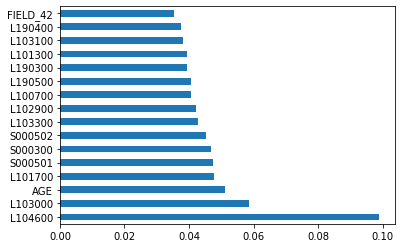

L104600     0.098845
L103000     0.058646
AGE         0.051075
L101700     0.047687
S000501     0.047498
S000300     0.046939
S000502     0.045296
L103300     0.042680
L102900     0.042063
L100700     0.040747
L190500     0.040648
L190300     0.039471
L101300     0.039382
L103100     0.038174
L190400     0.037525
FIELD_42    0.035460
FIELD_38    0.032768
SEX         0.032198
FIELD_41    0.031743
FIELD_4     0.031010
dtype: float64


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(20))

In [43]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:20]))

['L104600', 'L103000', 'S000300', 'S000501', 'S000502', 'L101700', 'L103300', 'SEX', 'L190400', 'AGE', 'L190500', 'L100700', 'L101300', 'L190300', 'L102900', 'L103100', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31']


======================================
========

In [53]:
diabetic = mydata[mydata.CLASS==2]
prediabetic = mydata[mydata.CLASS==1]
normal = mydata[mydata.CLASS==0]

print(diabetic.shape[0],prediabetic.shape[0],normal.shape[0])

1104 17575 52219


In [57]:
diabetic_test = diabetic.sample(300)
prediabetic_test = prediabetic.sample(300)
normal_test = normal.sample(300)
test=pd.concat([diabetic_test,prediabetic_test,normal_test])

diabetic_train = diabetic.drop(diabetic_test.index)
prediabetic_train = prediabetic.drop(prediabetic_test.index)
normal_train = normal.drop(normal_test.index)
train=pd.concat([diabetic_train,prediabetic_train,normal_train])

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=5,n_estimators=100,max_depth=10 )
rf.fit(train.iloc[:,:-1],train.iloc[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [71]:
ypred= rf.predict(test.iloc[:,:-1])

In [72]:
score=rf.score(test.iloc[:,:-1],test.iloc[:,-1])
print(score)

0.9722222222222222


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.iloc[:,-1],ypred)

array([[300,   0,   0],
       [  0, 300,   0],
       [  0,  25, 275]], dtype=int64)

In [80]:
print("Accuracy on training set: {:.3f}".format(rf.score(train.iloc[:,:-1],train.iloc[:,-1])))
print("Accuracy on test set: {:.3f}".format(rf.score(test.iloc[:,:-1],test.iloc[:,-1] ))) 
ypred=rf.predict(test.iloc[:,:-1])

confmatrx=pd.DataFrame(confusion_matrix(test.iloc[:,-1],ypred))
confmatrx.head()


Accuracy on training set: 1.000
Accuracy on test set: 0.972


,0,1,2
0,300,0,0
1,0,300,0
2,0,25,275


In [79]:

from sklearn.metrics import classification_report
#target_names = ['Normal', 'Pre-Diabetic', 'Diabetic']
#print(classification_report(ytest, ypred, target_names=target_names))
print(classification_report(test.iloc[:,-1], ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.92      1.00      0.96       300
           2       1.00      0.92      0.96       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

